### Importing Libraries

In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Data Preprocessing

### Training image preprocessing

In [19]:
train_directory = r"C:\Users\Sunny Mishra\Desktop\Plant_Disease_Prediction_copy\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train"
valid_directory = r"C:\Users\Sunny Mishra\Desktop\Plant_Disease_Prediction_copy\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid"

In [20]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 70295 files belonging to 38 classes.


In [21]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_directory,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 17572 files belonging to 38 classes.


# Building Model

In [23]:
cnn = tf.keras.models.Sequential()

In [24]:
## Building Convolution Layer

In [25]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [26]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [27]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [28]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [29]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [30]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [31]:
cnn.add(tf.keras.layers.Flatten())

In [32]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [33]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [34]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

# Compiling and Training Phase

In [36]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [63]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 210s 95ms/step - loss: 0.6406 - accuracy: 0.7986 - val_loss: 0.3561 - val_accuracy: 0.8902
Epoch 2/10
2197/2197 [==============================] - 229s 104ms/step - loss: 0.3275 - accuracy: 0.8939 - val_loss: 0.2229 - val_accuracy: 0.9273
Epoch 3/10
2197/2197 [==============================] - 230s 104ms/step - loss: 0.2143 - accuracy: 0.9305 - val_loss: 0.1805 - val_accuracy: 0.9408
Epoch 4/10
2197/2197 [==============================] - 234s 107ms/step - loss: 0.1540 - accuracy: 0.9496 - val_loss: 0.1437 - val_accuracy: 0.9524
Epoch 5/10
2197/2197 [==============================] - 232s 105ms/step - loss: 0.1128 - accuracy: 0.9630 - val_loss: 0.1352 - val_accuracy: 0.9574
Epoch 6/10
2197/2197 [==============================] - 236s 107ms/step - loss: 0.0968 - accuracy: 0.9682 - val_loss: 0.2026 - val_accuracy: 0.9393
Epoch 7/10
2197/2197 [==============================] - 236s 107ms/step - loss: 0.0808 - accuracy: 0.9743 - val_l

## Evaluating Model

In [65]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 68s 31ms/step - loss: 0.0135 - accuracy: 0.9959
Training accuracy: 0.9958602786064148


In [67]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 16s 29ms/step - loss: 0.0951 - accuracy: 0.9725
Validation accuracy: 0.9725130796432495


## Saving Model

In [69]:
cnn.save('trained_plant_disease_model.keras')

In [71]:
training_history.history #Return Dictionary of history

{'loss': [0.6406267285346985,
  0.3274896740913391,
  0.21434195339679718,
  0.154021754860878,
  0.11276162415742874,
  0.09683038294315338,
  0.08082915842533112,
  0.06603021174669266,
  0.057709649205207825,
  0.05191117897629738],
 'accuracy': [0.798591673374176,
  0.8938900232315063,
  0.9305071234703064,
  0.949583888053894,
  0.9630272388458252,
  0.9682053923606873,
  0.9743367433547974,
  0.9785475730895996,
  0.9814780354499817,
  0.9829717874526978],
 'val_loss': [0.35607171058654785,
  0.22288772463798523,
  0.18048813939094543,
  0.14374500513076782,
  0.13520990312099457,
  0.20260712504386902,
  0.11352266371250153,
  0.12353109568357468,
  0.09291666001081467,
  0.09508243203163147],
 'val_accuracy': [0.890166163444519,
  0.9272706508636475,
  0.9408149123191833,
  0.9524242877960205,
  0.9574322700500488,
  0.9392784237861633,
  0.9648873209953308,
  0.9630093574523926,
  0.9721716642379761,
  0.9725130796432495]}

In [75]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [77]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

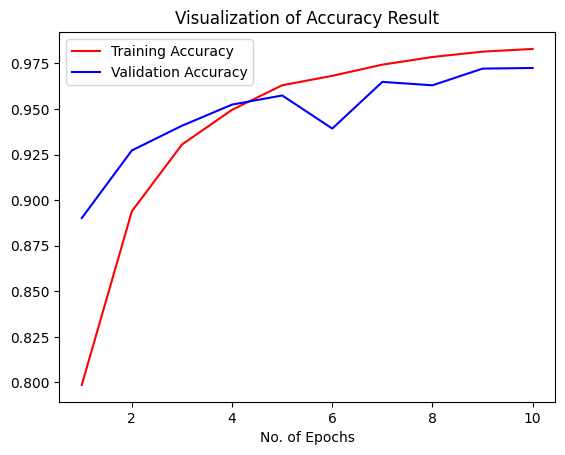

In [79]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [81]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [83]:
test_set = tf.keras.utils.image_dataset_from_directory(
    valid_directory,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [85]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 70s 4ms/step


In [87]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [88]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [89]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [93]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.96      0.96       504
                                 Apple___Black_rot       0.96      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.98      1.00      0.99       440
                                   Apple___healthy       0.98      0.97      0.97       502
                               Blueberry___healthy       0.97      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.89      0.92       410
                       Corn_(maize)___Common_rust_       0.98      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.96      0.

In [95]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_true,predicted_categories)


## Confusion Matrix Visualization 

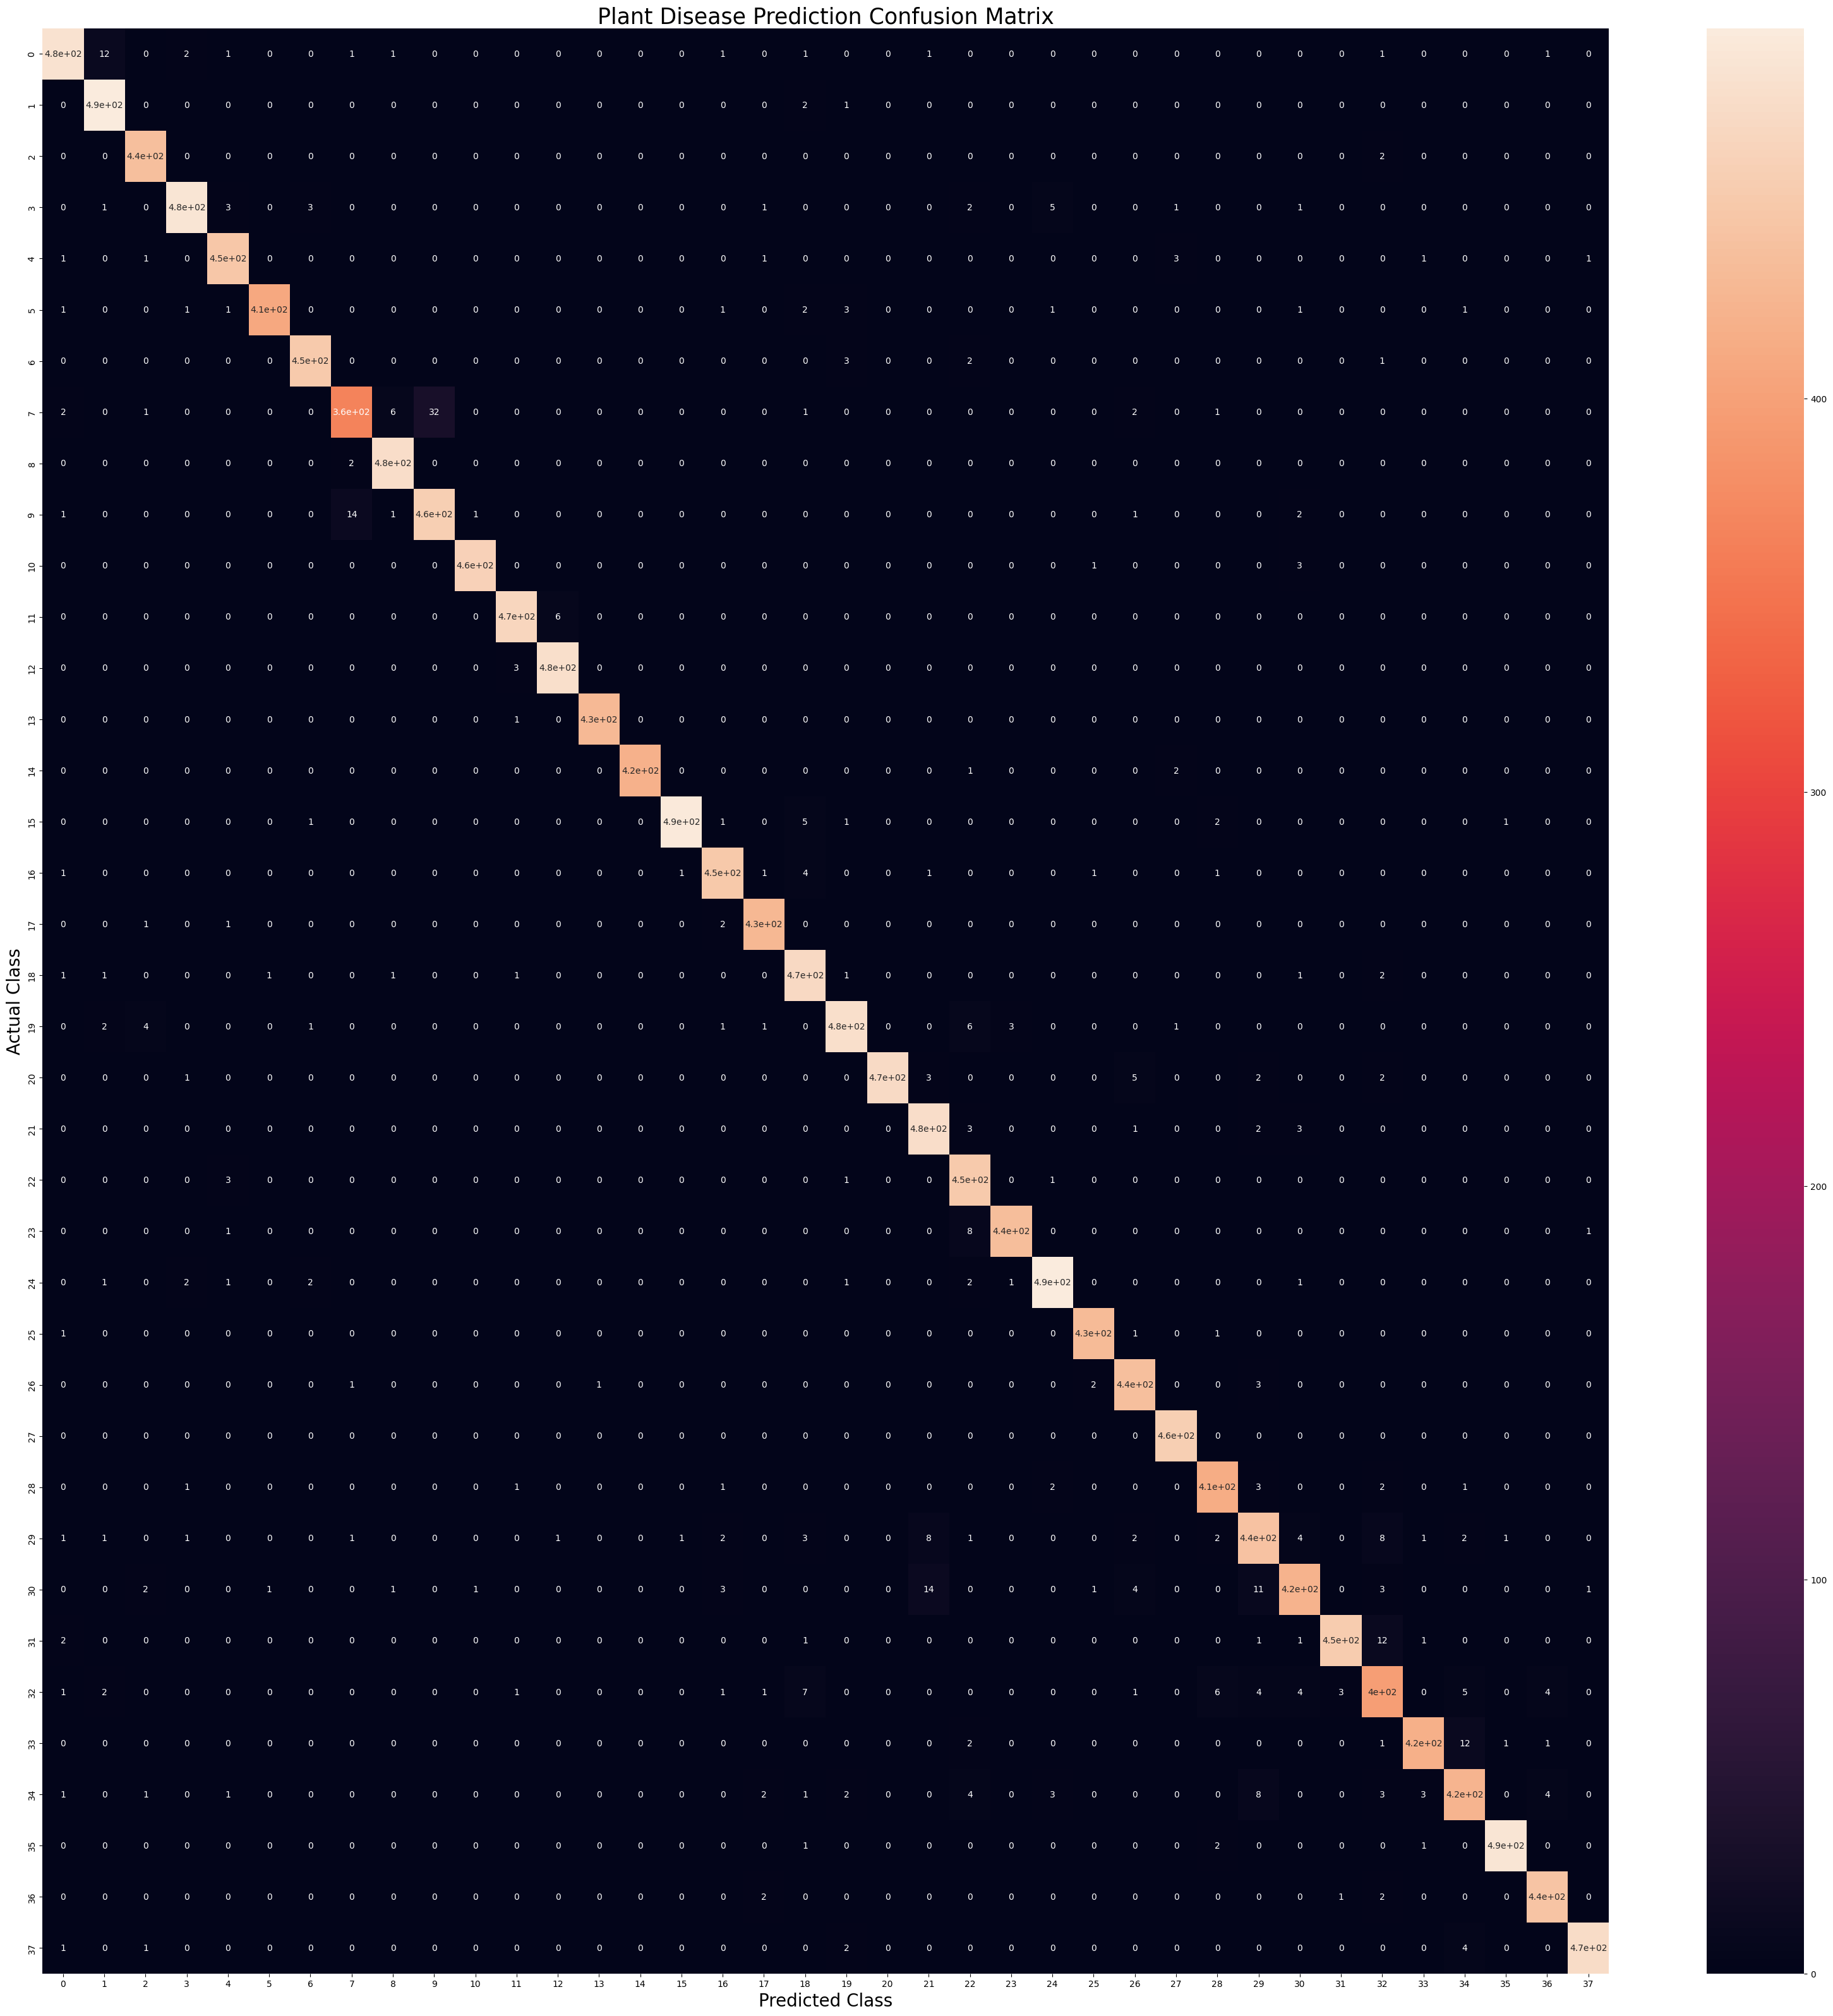

In [97]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [102]:
from tensorflow import keras
cnn = keras.models.load_model('trained_plant_disease_model.keras')
cnn.summary()  # To confirm the model is loaded properly


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [104]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [108]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [110]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [1]:
!where python  # For Windows


C:\Users\Sunny Mishra\anaconda3\envs\plant-disease-cnn\python.exe
C:\Users\Sunny Mishra\AppData\Local\Programs\Python\Python38\python.exe
C:\Users\Sunny Mishra\anaconda3\python.exe
C:\Users\Sunny Mishra\AppData\Local\Programs\Python\Python313\python.exe
C:\Users\Sunny Mishra\AppData\Local\Microsoft\WindowsApps\python.exe


INFO: Could not find "#".
INFO: Could not find "For".
INFO: Could not find "Windows".
